<a href="https://colab.research.google.com/github/Sathyapriyaiitm/Projectsiitm/blob/main/Fraud%20detection%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FRAUD DETECTION - CREDIT CARD

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


following algorithms we have used:
- Logistic regression
- KNeighbour classifier
- decision tree
- random forest classifier
- XGBoost

techniques for undersampling or oversampling
- random undersampling
- random oversampling
- tomek links undersampling
- cluster centroid undersampling
- SMOTE oversampling
- SMOTE + tomek

STeps
- reading, and visualisation of the data
- preping the data for the model
- build the model
- evaluate the model


In [ ]:
# reading and preprocessing

df= pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
# scaling

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
x_scaled = scaler.fit_transform(x.iloc[:,[0,-1]])
x.iloc[:,[0,-1]] = x_scaled


In [ ]:
df = pd.concat([x,y],axis=1)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.610671,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.732690,0.0
1,-1.610671,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.293931,0.0
2,-1.610619,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.891862,0.0
3,-1.610619,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.372414,0.0
4,-1.610568,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.634345,0.0


No fraud : 99.74 % of the dataset
fraud : 0.26 % of the datase

 Class
0.0    41574
1.0      108
Name: count, dtype: int64


<Axes: title={'center': 'Class Distributions in the Dataset'}, xlabel='Class'>

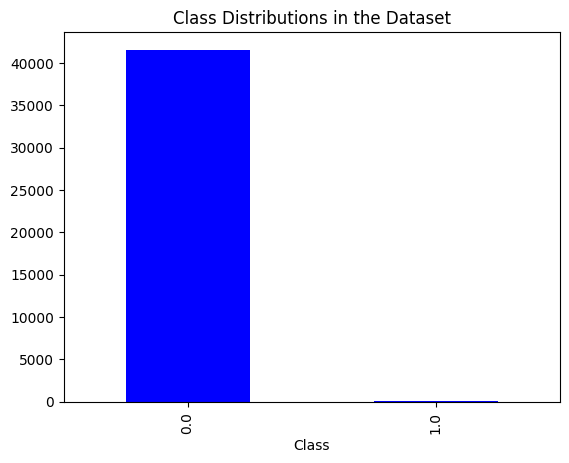

In [ ]:
print('No fraud :', round(df['Class'].value_counts()[0]/len(df) * 100, 2), '% of the dataset')
print('fraud :',round(df['Class'].value_counts()[1]/len(df)*100, 2), '% of the datase' )

print('\n',df['Class'].value_counts())
df['Class'].value_counts().plot(kind='bar', title='Class Distributions in the Dataset', color = 'blue')

In [ ]:
# making balanced dataset

fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0]
non_fraud_df = non_fraud_df.sample(len(fraud_df), random_state=42)

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
22898,0.061124,-7.793633,4.079169,-5.906163,1.394211,-4.427430,-1.697991,-3.165651,5.070980,-0.113348,...,0.295956,-0.009052,-0.172825,0.398732,-0.269771,-0.383162,0.096471,-0.002097,-0.317241,0.0
1280,-1.559786,1.164831,0.262046,0.633389,0.647052,-0.343423,-0.670806,0.107001,-0.171607,-0.195060,...,-0.182719,-0.463408,0.175720,0.434133,0.142678,0.097672,-0.005952,0.024662,-0.089793,0.0
40261,0.455546,0.964557,-0.080699,0.260660,1.353041,-0.451988,-0.818655,0.327030,-0.244268,-0.054082,...,0.156424,0.191426,-0.234652,0.408019,0.628710,-0.296167,-0.007127,0.046743,1.655172,0.0
2401,-1.509879,-1.411784,-0.644733,2.029215,-0.361968,-0.698192,0.642439,0.754600,0.242317,-1.675757,...,-0.068489,-0.216641,0.395316,-0.058140,0.485601,-0.416702,0.000850,0.087316,3.329379,0.0
6717,-1.178072,-1.813280,4.917851,-5.926130,5.701500,1.204393,-3.035138,-1.713402,0.561257,-3.796354,...,0.615642,-0.406427,-0.737018,-0.279642,1.106766,0.323885,0.894767,0.569519,-0.317241,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41395,0.481426,-4.446847,-0.014793,-5.126307,6.945130,5.269255,-4.297177,-2.591242,0.342671,-3.880663,...,0.247913,-0.049586,-0.226017,-0.401236,0.856124,0.661272,0.492560,0.971834,-0.317241,1.0
6641,-1.190368,0.857321,4.093912,-7.423894,7.380245,0.973366,-2.730762,-1.496497,0.543015,-2.351190,...,0.375026,0.145400,0.240603,-0.234649,-1.004881,0.435832,0.618324,0.148469,-0.317241,1.0
27749,0.174007,-0.860827,3.131790,-5.052968,5.420941,-2.494141,-1.811287,-5.479117,1.189472,-3.908206,...,1.192694,0.090356,-0.341881,-0.215924,1.053032,0.271139,1.373300,0.691195,-0.068690,1.0
35854,0.359693,-0.707519,1.458987,1.145906,0.955085,1.417468,0.211516,1.274197,0.045286,-1.881311,...,0.006185,-0.144132,-0.586517,-0.855740,0.853525,0.039871,-0.029126,0.028564,-0.311586,0.0


In [ ]:
print('No Frauds', round(new_df['Class'].value_counts()[0]/len(new_df) * 100 , 2), '% of the dataset')
print('Frauds', round(new_df['Class'].value_counts()[1]/len(new_df) * 100 , 2), '% of the dataset')

No Frauds 50.0 % of the dataset
Frauds 50.0 % of the dataset


## correlation matrix

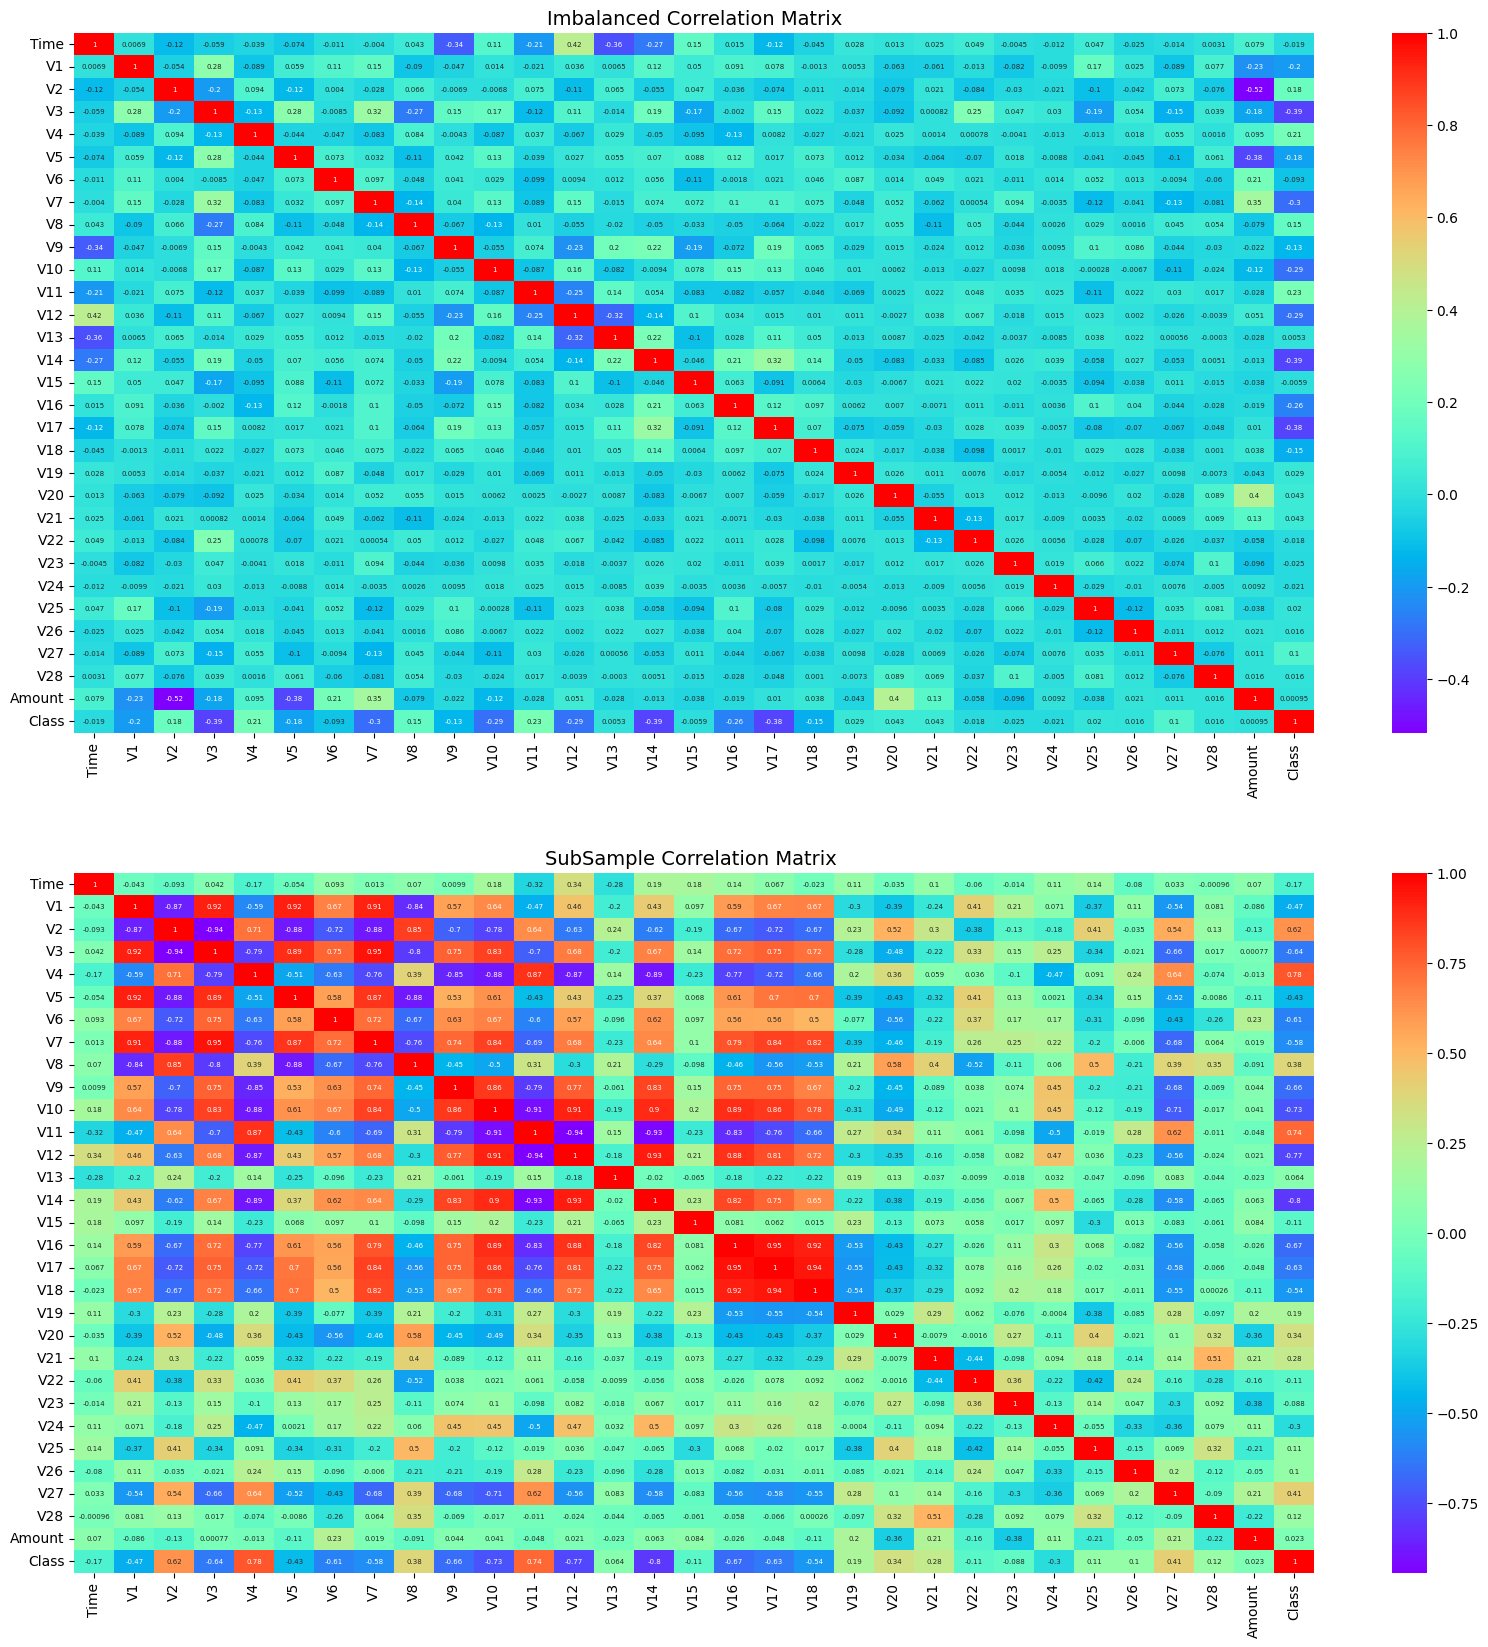

In [ ]:
# Make sure we use the 50-50 percent sample rows in our correlation, (balanced dataset)

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,20))

# correlation usin original imbalanced dataframe
corr = df.corr()
sns.heatmap(corr, cmap='rainbow',annot=True, annot_kws={'size':5}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix", fontsize=14)

# correlation using new balanced dataframe
sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='rainbow',annot = True,annot_kws={'size':5}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix ', fontsize=14)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.axhline(0, color='gray', linewidth=0.8, linestyle='--')
ax.axvline(0, color='gray', linewidth=0.8, linestyle='--')

scatter = ax.scatter([], [], color='blue', alpha=0.7)

corr_text = ax.text(-0.9, 0.9, "", fontsize=12, color="red", bbox=dict(facecolor='white', alpha=0.7))

n_points = 100
angles = np.linspace(0, np.pi, 50)
data = []
for angle in angles:
    mean = [0, 0]
    cov = [[1, np.cos(angle)], [np.cos(angle), 1]]
    points = np.random.multivariate_normal(mean, cov, size=n_points)
    data.append((points[:, 0], points[:, 1], np.cos(angle)))

def update(frame):
    x, y, corr = data[frame]
    scatter.set_offsets(np.c_[x, y])
    corr_text.set_text(f"Correlation: {corr:.2f}")
    return scatter, corr_text

ani = FuncAnimation(fig, update, frames=len(data), interval=1000, blit=True)
plt.close(fig)
from IPython.display import HTML
HTML(ani.to_jshtml())

## choosing the class objects and using the k cross validation on them

In [ ]:
x = new_df.drop('Class', axis=1)
y = new_df['Class']


from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# creating a dictionary of ML objects
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    # "RandomForestClassifier": RandomForestClassifier(),
    # "XGBClassifier": XGBClassifier(),
    # "AdaBoostClassifier": AdaBoostClassifier(),
    # "GradientBoostingClassifier": GradientBoostingClassifier()
}

# appying cross validation
from sklearn.model_selection import cross_val_score

#iterating thru each of the algos in the "classifiers" dictionary
for key, classifier in classifiers.items():

    #Splitting the data into 5 parts using cv=5 parameter of cross_val_score method
    training_score = cross_val_score(classifier, x_train, y_train, cv=5)

    print("Classifiers: ", classifier.__class__.__name__,
          "Has a training score of", round(training_score.mean() * 100, 2) , "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 95.34 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 94.17 % accuracy score
Classifiers:  SVC Has a training score of 94.18 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 93.65 % accuracy score


## finding the best classifier with the best parameter by k cross validation

In [ ]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(x_train, y_train)

# logistic regression best parameters.
log_reg = grid_log_reg.best_estimator_

#--------------------------

# KNeighborsClassifier
knearst_params = {"n_neighbors": list(range(2,5,1))}
grid_knears = GridSearchCV(KNeighborsClassifier(), knearst_params)
grid_knears.fit(x_train, y_train)

# KNears best estimator
knearst_neighbors = grid_knears.best_estimator_

#--------------------------

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(x_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

#--------------------------

# DecisionTree Classifier
tree_params = {"max_depth": list(range(2,4,1)), "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(x_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

print("Classifers with their tuned parameters we got via GridSearchCV")
print(log_reg)
print(knearst_neighbors)
print(svc)
print(tree_clf)

Classifers with their tuned parameters we got via GridSearchCV
LogisticRegression(C=0.1)
KNeighborsClassifier(n_neighbors=3)
SVC(C=0.9)
DecisionTreeClassifier(max_depth=2, min_samples_leaf=6)


In [ ]:
#dictionary of classifiers objects which we got in the above cell via GridSearchCV
#with the tuned parameters
tuned_classifiers = {
    "LogisiticRegression": log_reg,
    "Knearst Neighbors": knearst_neighbors,
    "Support Vector Classifier": svc,
    "DecisionTreeClassifier": tree_clf
}

#Making our Classifiers train with the tuned parameters
for key, classifier in tuned_classifiers.items():
    score = cross_val_score(classifier, x_train, y_train, cv=5)
    print(f'{key} Cross Validation Score: {round(score.mean() * 100, 2)}%')

LogisiticRegression Cross Validation Score: 95.34%
Knearst Neighbors Cross Validation Score: 93.6%
Support Vector Classifier Cross Validation Score: 94.18%
DecisionTreeClassifier Cross Validation Score: 95.36%


## working with a 2:1 set rather than a 1:1 set

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Use the original imbalanced dataset
x = df.drop('Class', axis=1)
y = df['Class']

# Drop rows with NaN values in either x or y
# Using df.dropna() is a concise way to achieve this for both
df_cleaned = df.dropna()
x = df_cleaned.drop('Class', axis=1)
y = df_cleaned['Class']


# StratifiedKFold is used for cross validation
# This cross-validation object is a variation of KFold that returns stratified folds.
# The folds are made by preserving the percentage of samples for each class.
from sklearn.model_selection import StratifiedKFold
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

# Define the desired ratio for oversampling and undersampling to achieve a 2:1 ratio of majority to minority class
# Oversample minority class (fraud) to be 100% of its original size
over = SMOTE(sampling_strategy=1.0, k_neighbors=5)
# Undersample majority class (non-fraud) to be 200% of the size of the oversampled minority class (which is the original minority class size)
under = RandomUnderSampler(sampling_strategy=0.5) # This will result in a 2:1 ratio of majority to minority


# iterating thru the dictionary of tuned classifiers
for key, classifier in tuned_classifiers.items():

    # list of steps to be provided to the ML Pipeline
    # Changed the order of steps to undersample first, then oversample
    steps=[('u',under),('o',over),('model',classifier)]

    # Creating a ML Pipeline
    FiPipeline=Pipeline(steps=steps)

    # Cross validating the classifiers
    scores=cross_val_score(FiPipeline,x,y,cv=sss)

    # Printing the mean accuracy score
    print(f"Classifiers: {key} Has a training score of, {round(scores.mean() * 100, 2)} % accuracy score")

Classifiers: LogisiticRegression Has a training score of, 98.06 % accuracy score
Classifiers: Knearst Neighbors Has a training score of, 97.69 % accuracy score
Classifiers: Support Vector Classifier Has a training score of, 99.29 % accuracy score
Classifiers: DecisionTreeClassifier Has a training score of, 95.67 % accuracy score


## optimizing the nearest neighbours from which new synthetic samples are generated

In [ ]:

model = Pipeline([
        ('sampling', SMOTE(sampling_strategy=0.1)),
        ('Random',RandomUnderSampler(sampling_strategy=0.5)),
        ('classification', log_reg)
    ])


SMOTE_KN = GridSearchCV(model,{'sampling__k_neighbors':list(range(1,10))})
SMOTE_KN.fit(x,y)

print(SMOTE_KN.best_estimator_)
print(SMOTE_KN.best_score_)
print(SMOTE_KN.best_params_)

# Training logistic regression classifier using SMOTE best parameter value for k_neighbors parameter
log_reg_score = cross_val_score(SMOTE_KN.best_estimator_, x, y, cv=sss)

# printing the mean accuracy score
print(f'Logistic Regression Cross Validation Score: {round(log_reg_score.mean() * 100, 2)}%')

Pipeline(steps=[('sampling', SMOTE(k_neighbors=3, sampling_strategy=0.1)),
                ('Random', RandomUnderSampler(sampling_strategy=0.5)),
                ('classification', LogisticRegression(C=0.1))])
0.9911233817197209
{'sampling__k_neighbors': 3}
Logistic Regression Cross Validation Score: 99.01%


In [ ]:
# creating a ML pipeline
# Keep the undersampling step first as it worked in the previous cell
model = Pipeline([
        ('Random',RandomUnderSampler(sampling_strategy=0.5)), # Undersample first
        ('sampling', SMOTE(sampling_strategy=1.0)), # Oversample second
        ('classification', log_reg) # Using the best logistic regression classifier from GridSearchCV
    ])

# Running GridSearchCV on our ML pipeline by varying the k_neighbors from 1 to 10
# to find the best k_neighbors parameter value
# NOTE :- in paramgrid use above key + 2 _ followed by parameter
SMOTE_KN = GridSearchCV(model,{'sampling__k_neighbors':list(range(1,10))})
SMOTE_KN.fit(x,y)

print(SMOTE_KN.best_estimator_)
print(SMOTE_KN.best_score_)
print(SMOTE_KN.best_params_)

# Training logistic regression classifier using SMOTE best parameter value for k_neighbors parameter
log_reg_score = cross_val_score(SMOTE_KN.best_estimator_, x, y, cv=sss)

# printing the mean accuracy score
print(f'Logistic Regression Cross Validation Score: {round(log_reg_score.mean() * 100, 2)}%')

Pipeline(steps=[('Random', RandomUnderSampler(sampling_strategy=0.5)),
                ('sampling', SMOTE(k_neighbors=6, sampling_strategy=1.0)),
                ('classification', LogisticRegression(C=0.1))])
0.9872609055854197
{'sampling__k_neighbors': 6}
Logistic Regression Cross Validation Score: 98.22%
